**Goal:** Analyse the Popularity of Different Programming Languages over Time

Which programming language is the most popular?

**Get the Data**

StackOverflow will help us answer this question. Each post on Stack OverFlow comes with a Tag. And this Tag can be the name of a programming language.

Run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get the .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

**Import Statements**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

**Load Data**

In [2]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

**Exploratory Data Analysis (EDA)**

In [3]:
# Get the first 5 rows
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,503
4,2008-08-01 00:00:00,c++,164


In [4]:
# Get the last 5 rows
df.tail()

,DATE,TAG,POSTS
2658,2024-07-01 00:00:00,php,922
2659,2024-07-01 00:00:00,python,5599
2660,2024-07-01 00:00:00,r,1079
2661,2024-07-01 00:00:00,ruby,95
2662,2024-07-01 00:00:00,swift,637


In [5]:
# Get 5 rows random
df.sample(5)

,DATE,TAG,POSTS
2442,2023-04-01 00:00:00,c++,1771
2168,2021-08-01 00:00:00,php,3853
1115,2015-05-01 00:00:00,java,18501
2562,2023-12-01 00:00:00,r,1597
2152,2021-07-01 00:00:00,javascript,14709


In [6]:
# Check how many rows and how many columns there are.
df.shape

(2663, 3)

In [7]:
# Print information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2663 entries, 0 to 2662
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    2663 non-null   object
 1   TAG     2663 non-null   object
 2   POSTS   2663 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 62.5+ KB


In [8]:
# Generate descriptive statistics.
df.describe(include='all')

,DATE,TAG,POSTS
count,2663,2663,2663.000000
unique,193,14,NaN
top,2016-07-01 00:00:00,c#,NaN
freq,14,193,NaN
mean,NaN,NaN,4604.585805
std,NaN,NaN,5691.988571
min,NaN,NaN,1.000000
25%,NaN,NaN,411.000000
50%,NaN,NaN,2245.000000
75%,NaN,NaN,6447.500000


**We have 14 programming languages**

In [9]:
# Count the number of entries in each column of the dataframe
df.count()

,0
DATE,2663
TAG,2663
POSTS,2663


## Which Programming language has had the highest total number of posts of all time?

In [10]:
# Calculate the total number of post per language.
df.groupby('TAG').sum().sort_values(by='POSTS', ascending=False)

,DATE,POSTS
TAG,,
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2530695
python,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2202356
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1918138
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1619422
php,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1466400
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,809500
r,2008-09-01 00:00:002008-11-01 00:00:002008-12-...,508025
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,405491
swift,2009-01-01 00:00:002009-02-01 00:00:002009-03-...,334495


**Javascript has had the highest total number of posts of all time followed by Python**

In [11]:
df.groupby('TAG').sum().sort_values(by='POSTS', ascending=True).head()

,DATE,POSTS
TAG,,
assembly,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,44608
delphi,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,52070
perl,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,68169
go,2009-11-01 00:00:002009-12-01 00:00:002010-01-...,73495
ruby,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,229148


**Assembly has had the least number of posts followed by delphi, perl and go**

## How many months of data exist per language? Which language had the fewest months with an entry?

In [12]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,192,192
c,192,192
c#,193,193
c++,192,192
delphi,192,192
go,177,177
java,192,192
javascript,192,192
perl,192,192


**We have 193 months from our data and go is the language with the fewest months**

**Data Cleaning**

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [13]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [14]:
df['DATE'].head()

,DATE
0,2008-07-01
1,2008-08-01
2,2008-08-01
3,2008-08-01
4,2008-08-01


**Data Manipulation**

Convert the DataFrame so that each programming language has its own column.

In [15]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,503.0,164.0,13.0,NaN,222.0,161.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,320.0,1640.0,755.0,104.0,NaN,1127.0,633.0,130.0,474.0,535.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1987.0,806.0,112.0,NaN,1147.0,722.0,128.0,604.0,505.0,NaN,246.0,NaN
2008-11-01,16.0,258.0,1729.0,734.0,140.0,NaN,954.0,581.0,97.0,497.0,447.0,1.0,154.0,NaN


In [16]:
reshaped_df.shape

(193, 14)

**We now have 193 rows and 14 columns in the new DataFrame. Each programming language became a column and our date column became the new index.**

In [17]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2024-03-01,139.0,734.0,2580.0,1333.0,98.0,323.0,2811.0,4703.0,47.0,1361.0,7354.0,1686.0,139.0,721.0
2024-04-01,184.0,733.0,2722.0,1307.0,105.0,302.0,2568.0,4238.0,26.0,1177.0,7313.0,1532.0,114.0,686.0
2024-05-01,178.0,662.0,2477.0,1424.0,101.0,269.0,2254.0,3984.0,38.0,1148.0,6883.0,1376.0,117.0,613.0
2024-06-01,87.0,534.0,1941.0,1071.0,68.0,225.0,1680.0,2972.0,30.0,952.0,5083.0,1092.0,110.0,577.0
2024-07-01,93.0,568.0,2186.0,1215.0,56.0,255.0,1753.0,3071.0,34.0,922.0,5599.0,1079.0,95.0,637.0


In [18]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [19]:
reshaped_df.count()

,0
TAG,
assembly,192
c,192
c#,193
c++,192
delphi,192
go,177
java,192
javascript,192
perl,192


In [20]:
reshaped_df.isna().values.any()

True

In [21]:
reshaped_df.isna().value_counts()

assembly  c      c#     c++    delphi  go     java   javascript  perl   php    python  r      ruby   swift
False     False  False  False  False   False  False  False       False  False  False   False  False  False    176
                                       True   False  False       False  False  False   False  False  False      7
                                                                                                     True       6
                                                                                       True   False  True       2
                                       False  False  False       False  False  False   False  False  True       1
True      True   False  True   True    True   True   True        True   True   True    True   True   True       1
Name: count, dtype: int64

In [22]:
# Substitute the number 0 for each NaN value in the DataFrame.
reshaped_df.fillna(0, inplace=True)
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,503.0,164.0,13.0,0.0,222.0,161.0,28.0,157.0,119.0,0.0,68.0,0.0
2008-09-01,28.0,320.0,1640.0,755.0,104.0,0.0,1127.0,633.0,130.0,474.0,535.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1987.0,806.0,112.0,0.0,1147.0,722.0,128.0,604.0,505.0,0.0,246.0,0.0
2008-11-01,16.0,258.0,1729.0,734.0,140.0,0.0,954.0,581.0,97.0,497.0,447.0,1.0,154.0,0.0


In [23]:
reshaped_df.isna().values.any()

False

**Data Visualisaton**


<Axes: xlabel='TAG', ylabel='POSTS'>

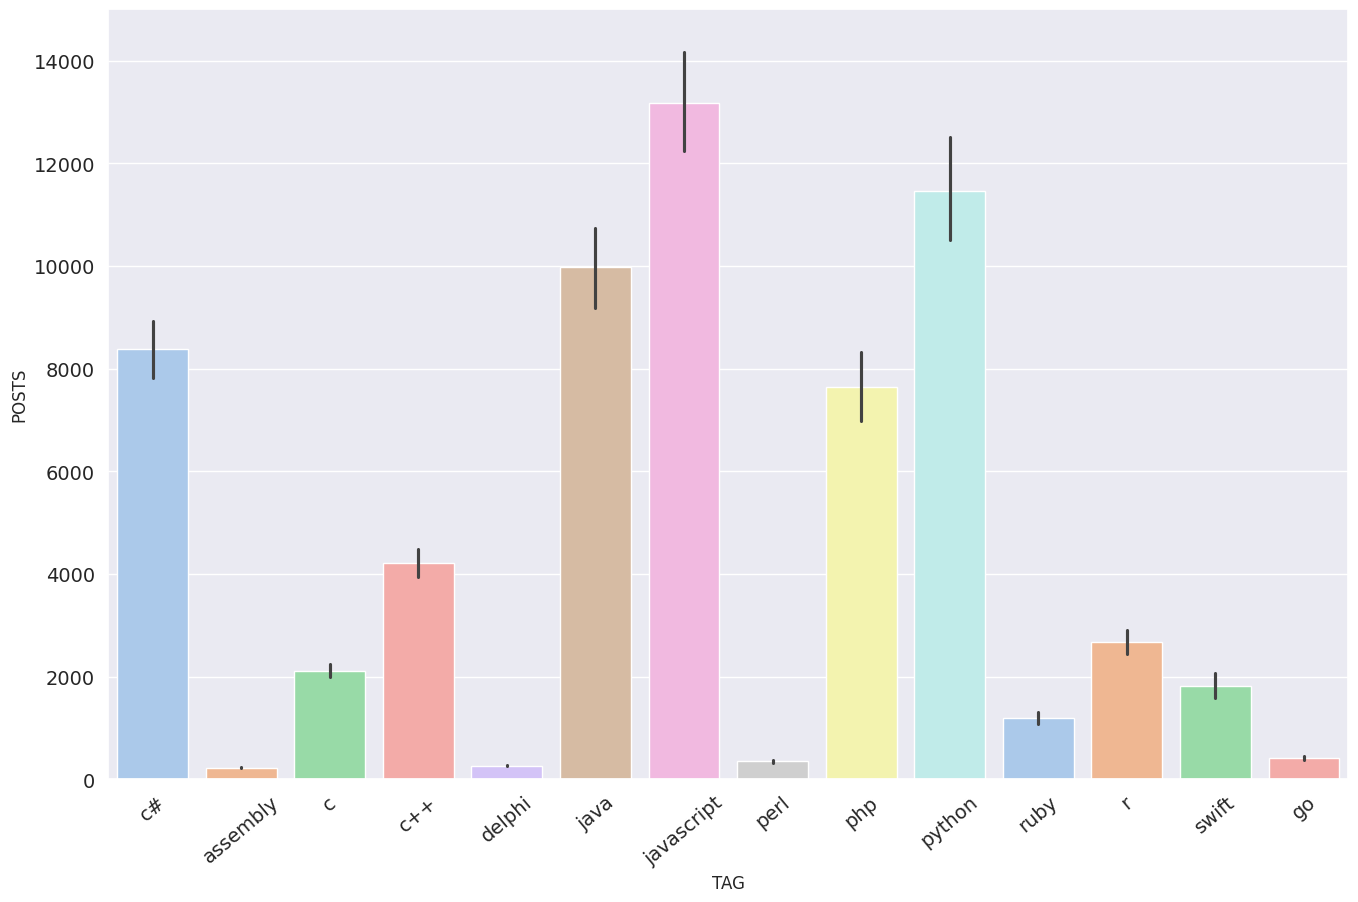

In [24]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(rotation=40)
plt.ylim(0, 15000)
sns.barplot(data=df, x='TAG', y='POSTS', palette='pastel', hue='TAG')

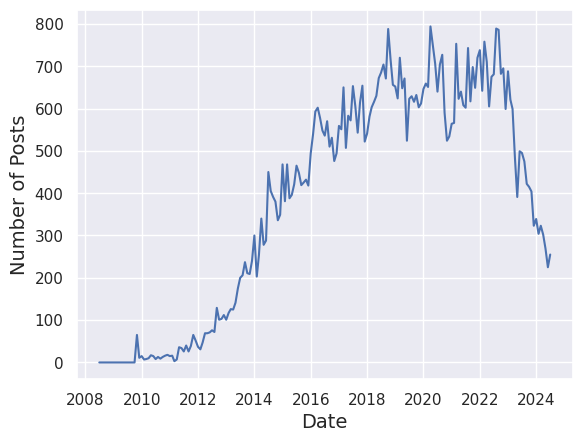

In [25]:
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.plot(reshaped_df.index, reshaped_df.go)

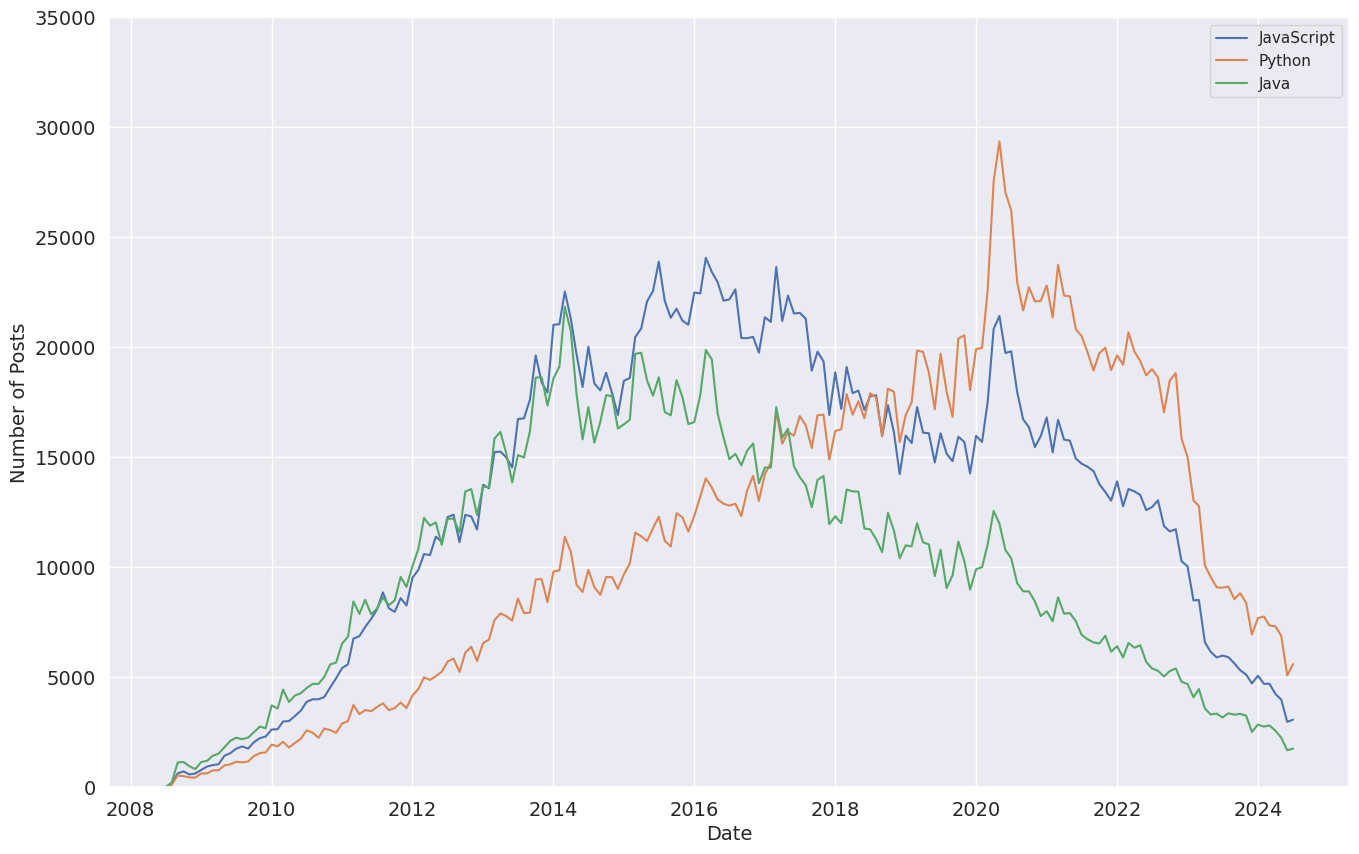

In [26]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)


# Plotting the data with labels
plt.plot(reshaped_df.index, reshaped_df.javascript, label='JavaScript')
plt.plot(reshaped_df.index, reshaped_df.python, label='Python')
plt.plot(reshaped_df.index, reshaped_df.java, label='Java')
plt.legend()
plt.show()

**Three most popular programming languages over time!!!⬆️**

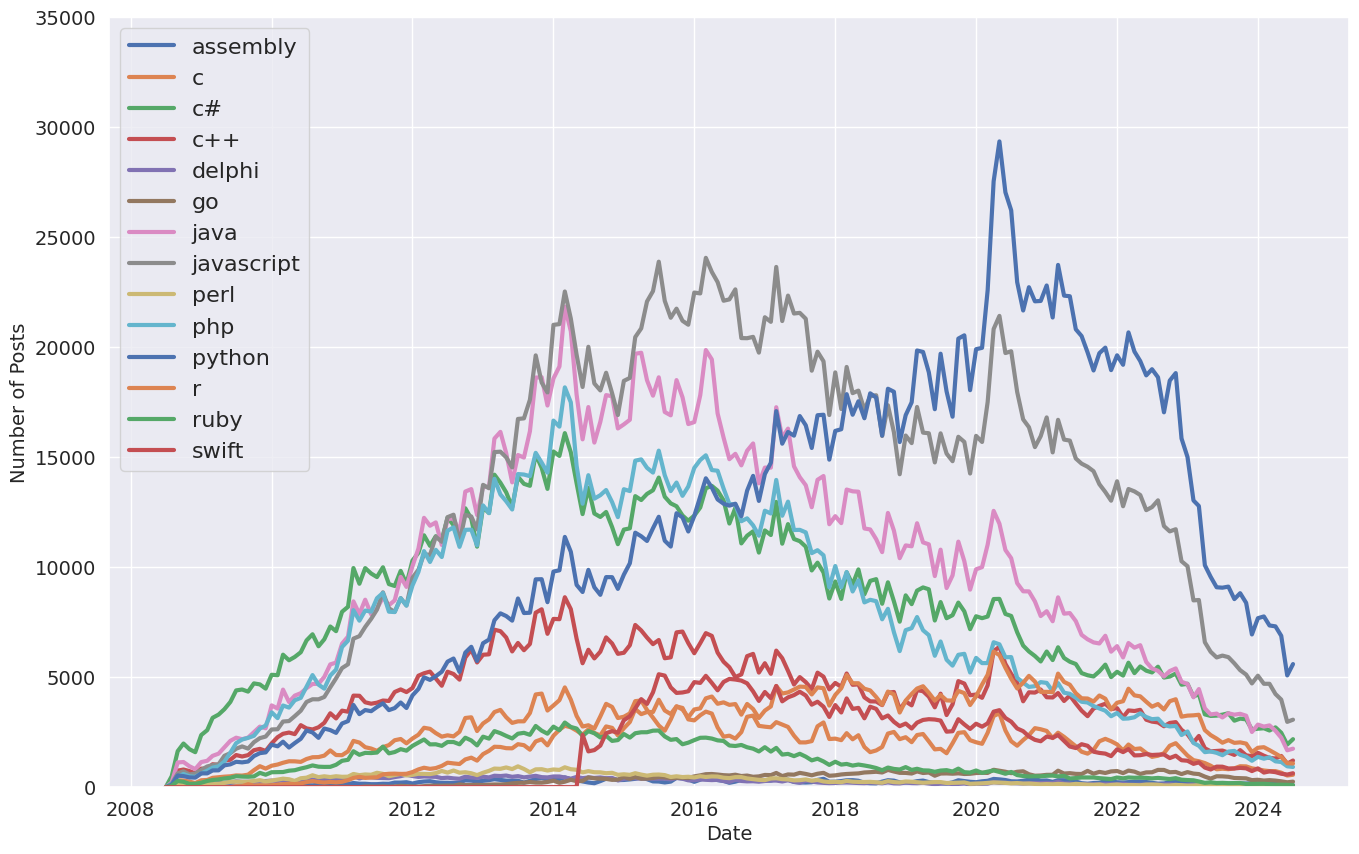

In [27]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16)

**Smoothing out Time Series Data**

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations.

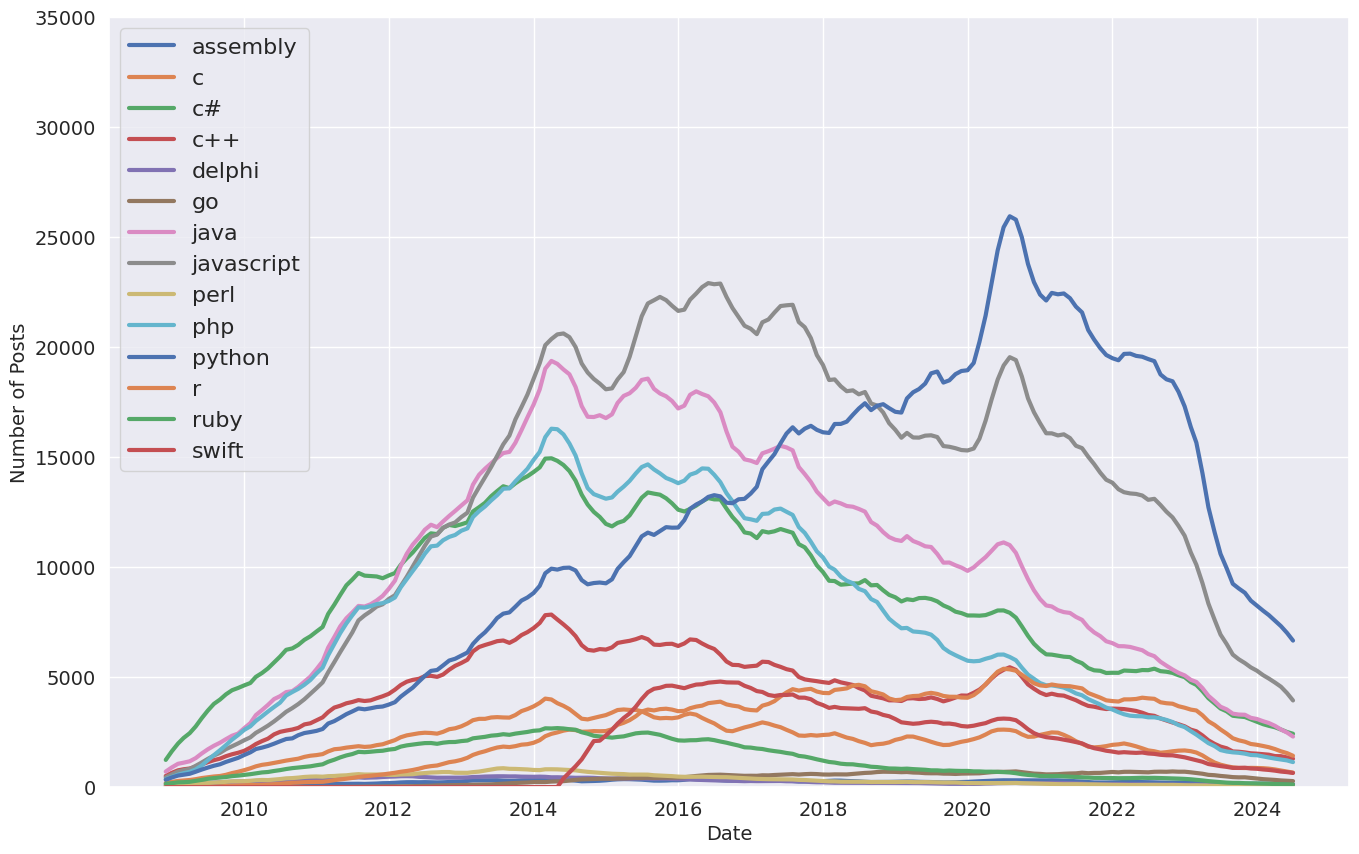

In [28]:
# Averaged observations
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)

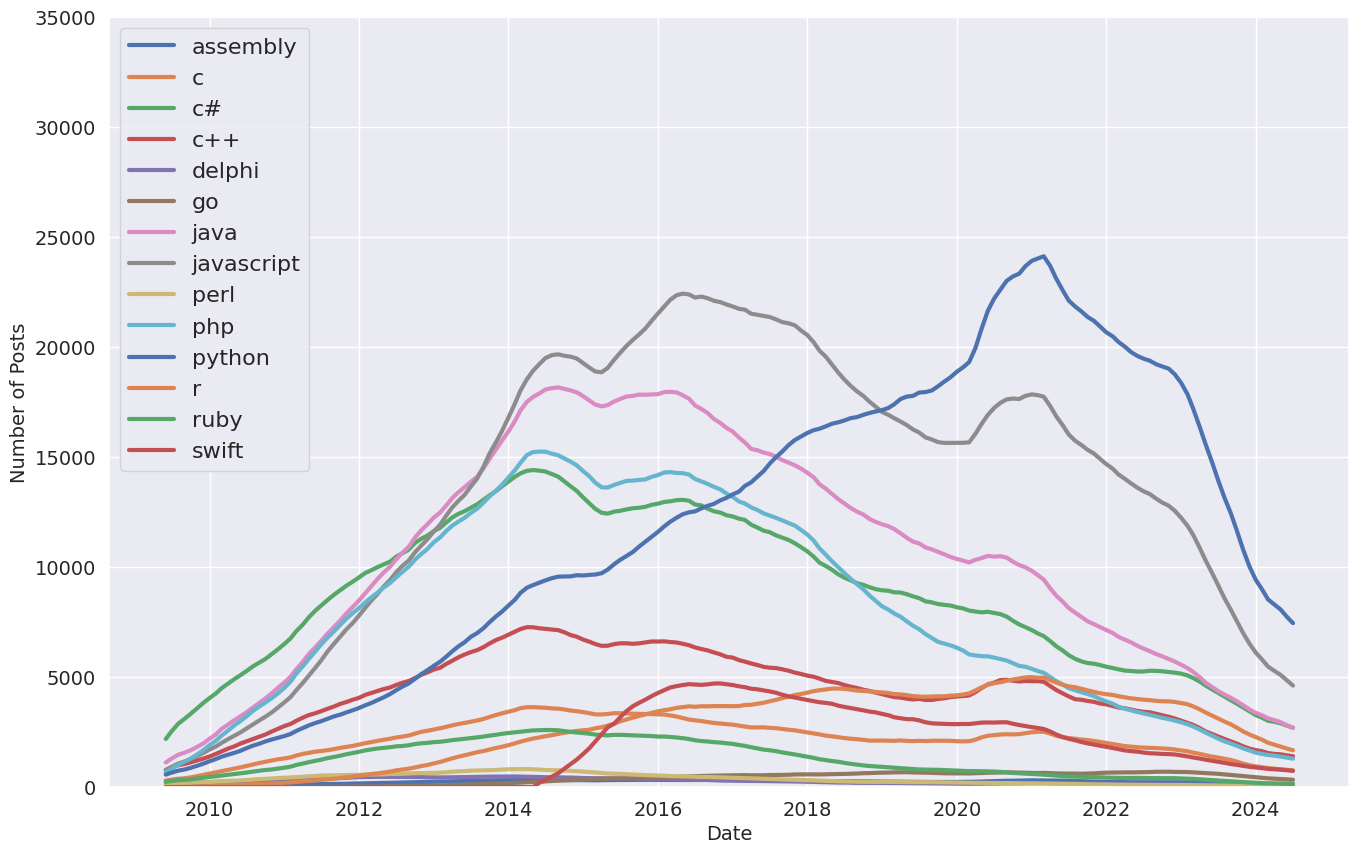

In [29]:
roll_df = reshaped_df.rolling(window=12).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)

**CONCLUSION:**
*Looks like Python is the most popular programming language judging by the number of posts on Stack Overflow! Python for the win! 😊😊*